<a href="https://colab.research.google.com/github/lekshmimurali1224/assignments_data_science/blob/main/EDA_CaseStudy_Nov29_LiveCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the data
from google.colab import files
uploaded = files.upload()

Saving customer_booking.csv to customer_booking.csv


In [3]:
#Getting the dataframe. For some files data is being encoded in a special way. So we have to specify the encoding. Data team to provide info about this encoding. We have different encoding methods.
df = pd.read_csv('customer_booking.csv', encoding = 'ISO-8859-1')
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
#Getting the type
print('Type : ', type(df))

Type :  <class 'pandas.core.frame.DataFrame'>


In [5]:
#Getting an idea about duplicates
df.duplicated().sum()
#There are 719 duplicate rows in the dataset.

719

# **Handling the duplicates**

In [6]:
#Dropping the duplicates
df.drop_duplicates(inplace = True)

In [7]:
df.duplicated().sum()

0

In [8]:
#Getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49281 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         49281 non-null  int64  
 1   sales_channel          49281 non-null  object 
 2   trip_type              49281 non-null  object 
 3   purchase_lead          49281 non-null  int64  
 4   length_of_stay         49281 non-null  int64  
 5   flight_hour            49281 non-null  int64  
 6   flight_day             49281 non-null  object 
 7   route                  49281 non-null  object 
 8   booking_origin         49281 non-null  object 
 9   wants_extra_baggage    49281 non-null  int64  
 10  wants_preferred_seat   49281 non-null  int64  
 11  wants_in_flight_meals  49281 non-null  int64  
 12  flight_duration        49281 non-null  float64
 13  booking_complete       49281 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.6+ MB


In [9]:
#Getting an idea about the NULL values. If False no null values.
df.isnull().sum().any()

False

In [10]:
#Getting an idea about proportion of values.
df['route'].value_counts()

,count
route,
AKLKUL,2620
PENTPE,912
MELSGN,833
ICNSIN,793
DMKKIX,729
...,...
AKLHGH,1
JEDPDG,1
JEDPEN,1


# **AKLKUL is the most common route that the passengers tavel.**

In [11]:
#Getting an idea about proportion of values in 'sales_channel'
df['sales_channel'].value_counts()

,count
sales_channel,
Internet,43917
Mobile,5364


# **Internet is the most common channel.**

In [12]:
#Getting an idea about proportion of values in 'flight_day'
df['flight_day'].value_counts(normalize = True)

,proportion
flight_day,
Mon,0.162091
Wed,0.153447
Tue,0.153365
Thu,0.148597
Fri,0.135651
Sun,0.130720
Sat,0.116130


In [13]:
df['flight_day'].value_counts()

,count
flight_day,
Mon,7988
Wed,7562
Tue,7558
Thu,7323
Fri,6685
Sun,6442
Sat,5723


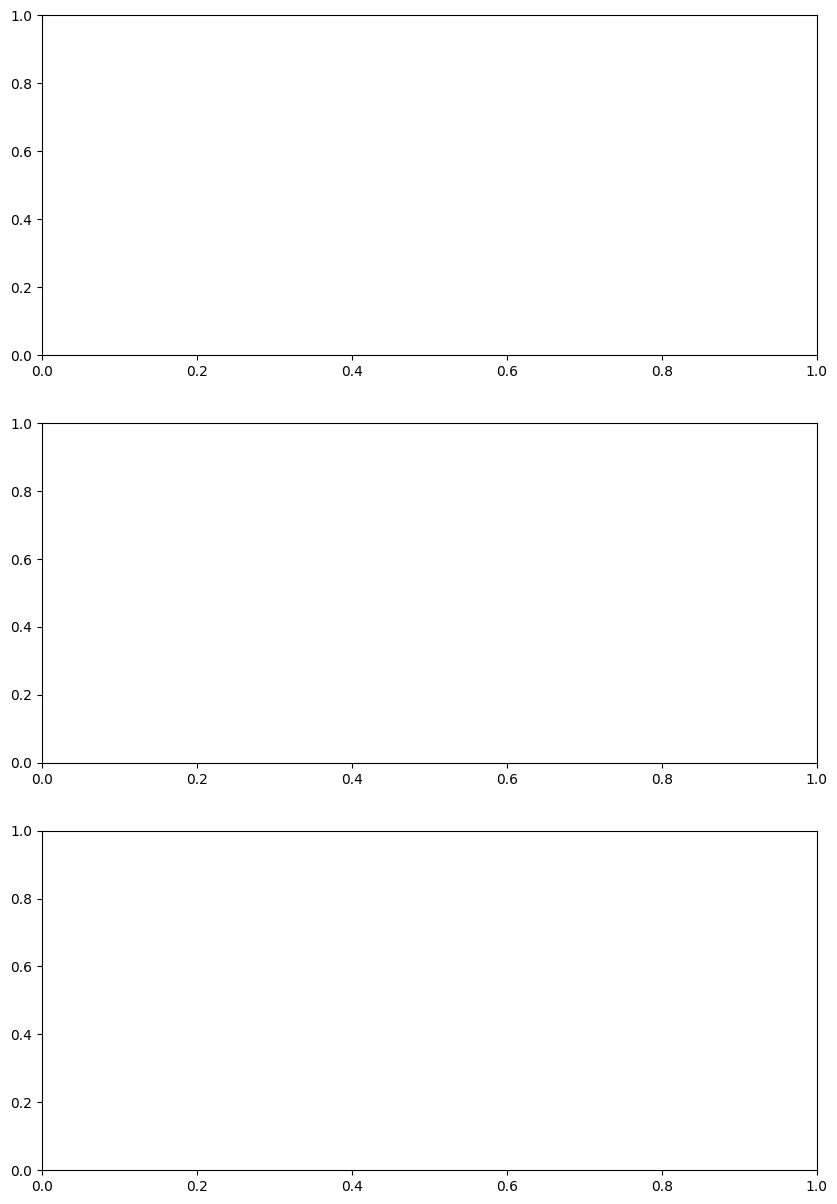

In [14]:
#Plot
#Setting the figure size
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

In [15]:
#Histogram for purchase lead
sns.histplot(df['purchase_lead'], bins = 9, kde = False, ax = ax[1])
ax[1].set_title('Histogram Purchase lead')
ax[1].set_xlabel('Purchase lead')
ax[1].set_ylabel('Frequency')

Text(4.444444444444452, 0.5, 'Frequency')

In [16]:
#Histogram for number of passengers.
sns.histplot(df['num_passengers'], bins = 9, kde = False, ax = ax[0])
ax[0].set_title('Histogram Number of passengers')
ax[0].set_xlabel('Number of passengers')
ax[0].set_ylabel('Frequency')

Text(4.444444444444452, 0.5, 'Frequency')

In [17]:
#Histogram for flight_duration
sns.histplot(df['flight_duration'], bins = 9, kde = False, ax = ax[2])
ax[2].set_title('Histogram Flight duration')
ax[2].set_xlabel('Flight duration')
ax[2].set_ylabel('Frequency')

Text(4.444444444444452, 0.5, 'Frequency')

In [18]:
#Display all plots
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

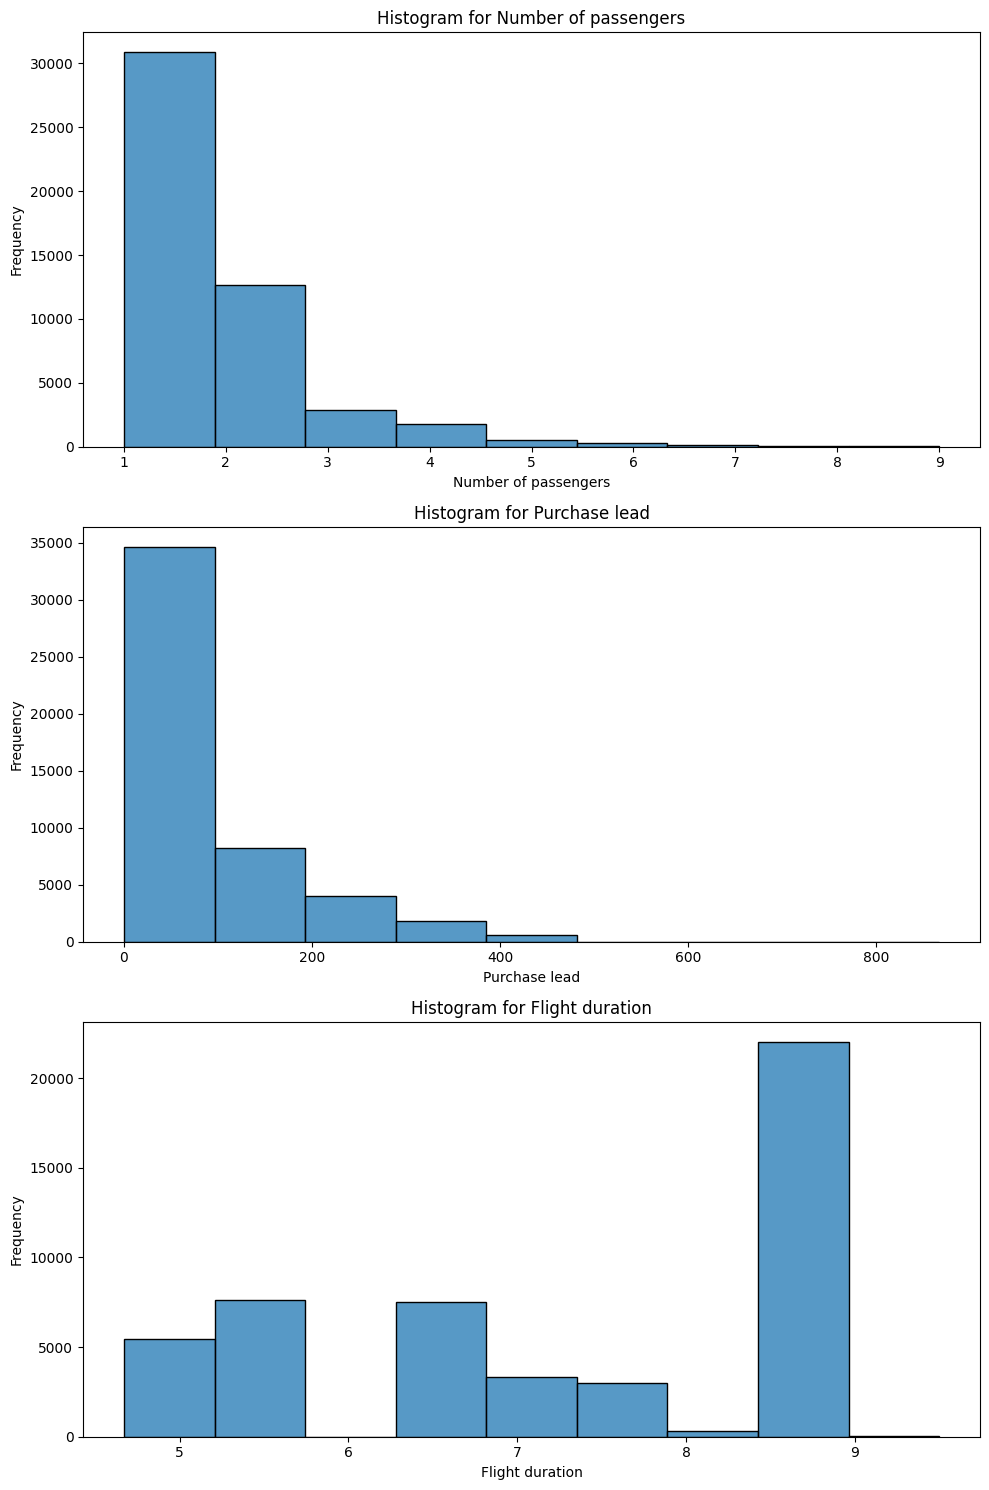

In [19]:
#Plot
#Setting the figure size
fig, ax = plt.subplots(3, 1, figsize=(10, 15))

#Histogram for number of passengers.
sns.histplot(df['num_passengers'], bins = 9, kde = False, ax = ax[0])
ax[0].set_title('Histogram for Number of passengers')
ax[0].set_xlabel('Number of passengers')
ax[0].set_ylabel('Frequency')

#Histogram for purchase lead
sns.histplot(df['purchase_lead'], bins = 9, kde = False, ax = ax[1])
ax[1].set_title('Histogram for Purchase lead')
ax[1].set_xlabel('Purchase lead')
ax[1].set_ylabel('Frequency')

#Histogram for flight_duration
sns.histplot(df['flight_duration'], bins = 9, kde = False, ax = ax[2])
ax[2].set_title('Histogram for Flight duration')
ax[2].set_xlabel('Flight duration')
ax[2].set_ylabel('Frequency')

#Display all plots
plt.tight_layout()
plt.show()

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 7))
cm = df.corr(numeric_only= True)

<Figure size 1000x700 with 0 Axes>

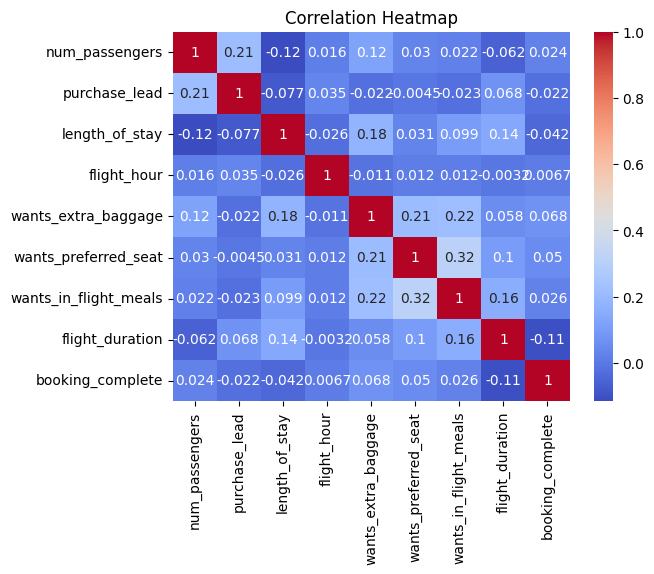

In [21]:
#Plot
sns.heatmap(cm, cmap= 'coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

# **Majority of the varibles seems to be almost uncorrelated wrt each other.**

In [22]:
print(cm)

                       num_passengers  purchase_lead  length_of_stay  \
num_passengers               1.000000       0.214999       -0.115380   
purchase_lead                0.214999       1.000000       -0.076747   
length_of_stay              -0.115380      -0.076747        1.000000   
flight_hour                  0.016393       0.035112       -0.025525   
wants_extra_baggage          0.120724      -0.021599        0.177536   
wants_preferred_seat         0.029509      -0.004459        0.031215   
wants_in_flight_meals        0.022252      -0.022533        0.098846   
flight_duration             -0.062028       0.067934        0.140408   
booking_complete             0.024092      -0.022132       -0.042080   

                       flight_hour  wants_extra_baggage  wants_preferred_seat  \
num_passengers            0.016393             0.120724              0.029509   
purchase_lead             0.035112            -0.021599             -0.004459   
length_of_stay           -0.025525  

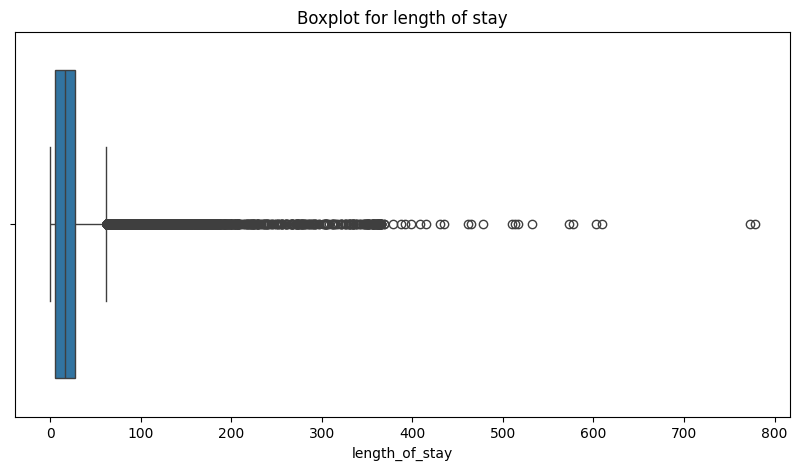

In [23]:
#Box Plot
#Visualization
#Boxplot for length of stay
plt.figure(figsize=(10,5))
sns.boxplot(x = df['length_of_stay'],data =df)
plt.title('Boxplot for length of stay')
plt.show()

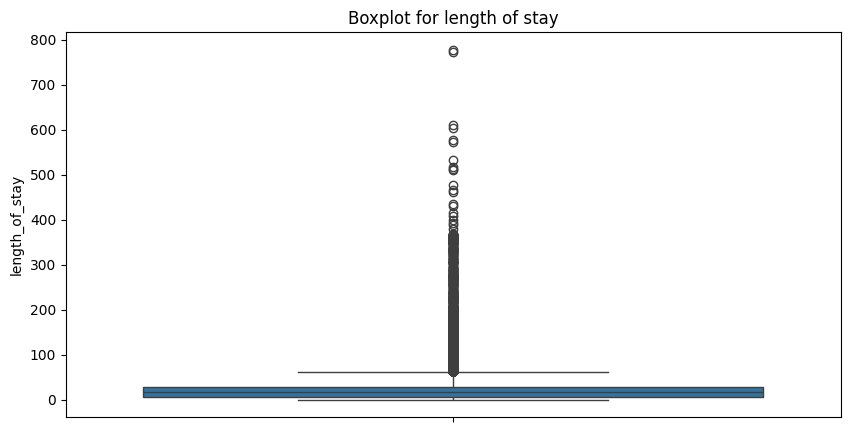

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(y = df['length_of_stay'],data =df)
plt.title('Boxplot for length of stay')
plt.show()

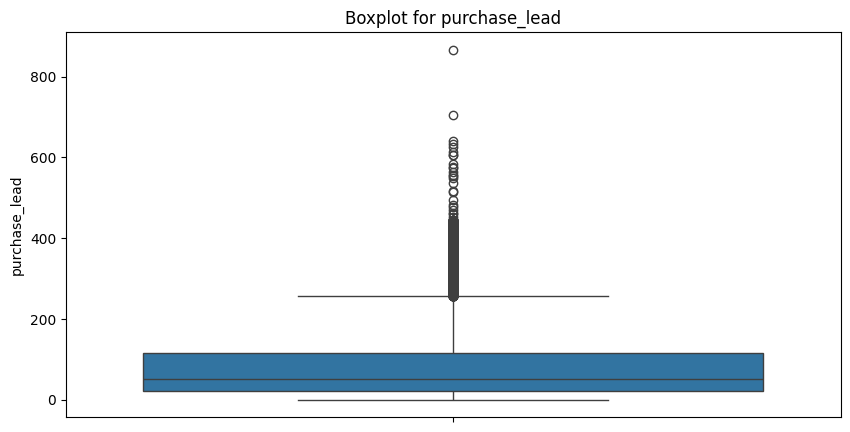

In [25]:
#Boxplot for purchase  lead
plt.figure(figsize=(10,5))
sns.boxplot(y = df['purchase_lead'],data =df)
plt.title('Boxplot for purchase_lead')
plt.show()